# Artificial Intelligence Midterm Project

In this project, you will build a regression model and a classification model from scratch. Please follow the instructions closely, and only use Python's Numpy, Pandas, and matplotlib library to complete this project. Using functions from `sklearn` is not allowed.

**Part I** dues on Monday, March 22nd at 11:59 PM.
**Part II** dues on Monday, April 12th at 11:59 PM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part I: A Regression Model

In this part, please build a multilinear regression model that extracts the relationship between housing prices and other relevant variables. The training data is shown in the table below:

In [2]:
data1 = pd.DataFrame({
    "YearBuilt": [1974, 1996, 1968, 1962, 1960],
    "YearSold": [2015, 2017, 2020, 2010, 2016],
    "Bedrooms": [3, 10, 4, 5, 6],
    "TotalArea": [1500, 4000, 1700, 2500, 2000],
    "Quality": [7.5, 6, 4, 5.5, 5],
    "Price": [358500, 452600, 352100, 341300, 342200]
})

data1

,YearBuilt,YearSold,Bedrooms,TotalArea,Quality,Price
0,1974,2015,3,1500,7.5,358500
1,1996,2017,10,4000,6.0,452600
2,1968,2020,4,1700,4.0,352100
3,1962,2010,5,2500,5.5,341300
4,1960,2016,6,2000,5.0,342200


### Task 1: Data Transformation (10 pts)
Create a new column named "Age" that represents the age of each house when it was sold.

In [3]:
# Your Code Here

In [4]:
data1['Age'] = data1['YearSold'] - data1['YearBuilt']
data1

,YearBuilt,YearSold,Bedrooms,TotalArea,Quality,Price,Age
0,1974,2015,3,1500,7.5,358500,41
1,1996,2017,10,4000,6.0,452600,21
2,1968,2020,4,1700,4.0,352100,52
3,1962,2010,5,2500,5.5,341300,48
4,1960,2016,6,2000,5.0,342200,56


### Task 2: Train a Multilinear Model (20 pts)
Assume that the price can be expressed as a linear combination of age, bedrooms, total area, and quality:

$Price = \theta_0 + \theta_1 \cdot Age + \theta_2 \cdot Bedrooms + \theta_3 \cdot TotalArea + \theta_4 \cdot Quality.$

Apply the normal equation to find the best values for the parameters:
1. Construct matrix $\textbf{X}$ and $\textbf{y}$ (the matrices are defined in Week 6 notebook and Chapter 4 of the textbook).
2. Calculate the parameter vector using the normal equation
$\theta = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$

In [5]:
# Your Code Here

In [6]:
np.set_printoptions(suppress=True)

In [7]:
X = np.hstack([np.ones([5, 1]), data1[["Age", "Bedrooms", "TotalArea", "Quality"]].values])
print(X)

[[   1.    41.     3.  1500.     7.5]
 [   1.    21.    10.  4000.     6. ]
 [   1.    52.     4.  1700.     4. ]
 [   1.    48.     5.  2500.     5.5]
 [   1.    56.     6.  2000.     5. ]]


In [8]:
y = data1[["Price"]].values
print(y)

[[358500]
 [452600]
 [352100]
 [341300]
 [342200]]


In [9]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Theta 0 to Theta 4:", theta)

Theta 0 to Theta 4: [[592376.38748739]
 [ -3839.25327952]
 [ 11727.19475278]
 [   -31.10898083]
 [ -8664.68213925]]


### Task 3: Make A Prediction (10 pts)
Suppose that there is another house with the following attribute:
- YearBuilt: 1985
- YearSold: 2021
- Bedrooms: 6
- Total Area: 2500
- Quality: 5.5

Use the parameter values that you have calculated to make a prediction on its sale price.

In [10]:
# Your Code Here

In [11]:
theta0 = 592376.39
theta1 = -3839.25
theta2 = 11727.19
theta3 = -31.11
theta4 = -8664.68

prediction = theta0 + theta1 * (2021 - 1985) + theta2 * 6 + theta3 * 2500 + theta4 * 5.5  
print(prediction)

399095.79000000004


## Part II: A Classification Model

In this part, we will build a logistic regression model and evaluate its performance on the classifying the data. The dataset is as follows:

In [12]:
data2 = pd.DataFrame([[5.0, 2.0, 1],
                      [6.2, 3.4, 1],
                      [4.9, 3.6, 0],
                      [6.2, 2.2, 1],
                      [5.7, 3.0, 1],
                      [4.8, 3.4, 0],
                      [5.0, 3.4, 0]],
                     columns=["x1", "x2", "class"])
data2

,x1,x2,class
0,5.0,2.0,1
1,6.2,3.4,1
2,4.9,3.6,0
3,6.2,2.2,1
4,5.7,3.0,1
5,4.8,3.4,0
6,5.0,3.4,0


### Task 1: Data Visualization (10 pts)
Visualize the data as a scatter plot. Show class 0 records as green dots and class 1 records as blue dots. Display the following items:
- Title of the plot: Distribution of the training data
- Label for x axis: x1
- Label for y axis: x2
- Legend

In [13]:
# Your Code Here

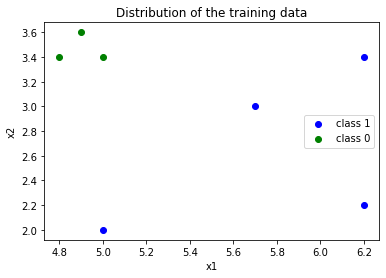

In [14]:
index_class1 = (data2['class'] == 1)
index_class0 = (data2['class'] == 0)
plt.scatter(data2.loc[index_class1, 'x1'],
            data2.loc[index_class1, 'x2'],
            c='blue',
            label='class 1')

plt.scatter(data2.loc[index_class0, 'x1'],
            data2.loc[index_class0, 'x2'],
            c='green',
            label='class 0')

plt.title("Distribution of the training data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

### Task 2: Apply A Logistic Regression Model (10 pts)

Suppose that you are given a logistic regression model with explicity paramter values:

$p = \sigma(\textbf{x}\cdot\theta^T).$

where
- p: the probability that the point belongs to class 1.
- $\textbf{x} = (1, x_1, x_2)$.
- $\theta = (\theta_0, \theta_1, \theta_2) = (-2.15, 0.92, -0.82)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$

Find the model's prediction on the following test set:

In [15]:
data3 = pd.DataFrame([[5.1, 3.4, 0],
                      [6.5, 2.8, 1],
                      [5.8, 2.7, 1],
                      [4.6, 3.1, 0]],
                     columns=["x1", "x2", "class"])
data3

,x1,x2,class
0,5.1,3.4,0
1,6.5,2.8,1
2,5.8,2.7,1
3,4.6,3.1,0


In [16]:
# Your Code Here

In [17]:
theta = np.array([-2.15, 0.92, -0.82])

x = np.hstack([np.ones([4,1]), data3.loc[:, ['x1', 'x2']]])

t = x.dot(theta)

y = 1 / (1 + np.e ** (-t))

predictions = []

for i in y:
    if i >= 0.5:
        prediction = 1
    else:
        prediction = 0
    predictions.append(prediction)
    
    
print("Theta: ",theta, "\n\n")
print("x: ", x, "\n\n")
print("t: ", t, "\n\n")
print("y: ", y, "\n\n")    
print("Predictions: ", predictions)

Theta:  [-2.15  0.92 -0.82] 


x:  [[1.  5.1 3.4]
 [1.  6.5 2.8]
 [1.  5.8 2.7]
 [1.  4.6 3.1]] 


t:  [-0.246  1.534  0.972 -0.46 ] 


y:  [0.43880828 0.82259081 0.72551796 0.38698582] 


Predictions:  [0, 1, 1, 0]


### Task 3: Model Evaluation (40 pts)
Calculate the following model metrics regarding the performance on the test set:
- classification accuracy
- precision score
- recall score
- F-1 score

In [18]:
# Your Code Here

In [19]:
# Classification Accuracy
array1 = np.array(data3['class'])
array2 = np.array(predictions)
print(array1)
print(array2)

count = 0
for i in range(len(array1)):
    actual = array1[i]
    pred = array2[i]
    if actual == pred:
        count = count + 1

accuracy = count / len(array1)
print("Accuracy: ", accuracy)

[0 1 1 0]
[0 1 1 0]
Accuracy:  1.0


In [20]:
# Precision Score
num_true_positives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 1 and pred == 1 :
        num_true_positives = num_true_positives + 1
print("True Positives: ", num_true_positives)

num_false_positives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 0 and pred == 1:
        num_false_positives = num_false_positives + 1
print("False Positives: ", num_false_positives)

precision = num_true_positives / (num_true_positives + num_false_positives)
print(precision)

True Positives:  2
False Positives:  0
1.0


In [21]:
# Recall Score

In [22]:
num_false_negatives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 1 and pred == 0:
        num_false_negatives = num_false_negatives + 1

print("True Positives: ", num_true_positives)
print("False Negatives: ", num_false_negatives)
recall = num_true_positives / (num_true_positives + num_false_negatives)
print("Recall: ", recall)

True Positives:  2
False Negatives:  0
Recall:  1.0


In [23]:
# F-1 Score

In [24]:
f1 = 2 / (1 / precision + 1 / recall)
print("F-1 Score: ", f1)

F-1 Score:  1.0
